In [1]:
import pandas as pd
import matplotlib.pyplot as plt

DEFAULT_COLORS = ['#0472c2', '#1ec5d6', '#fcd251', '#c36c6c', '#eac1c1', '#c5c5c5']

font = {'family' : 'Verdana',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)


In [2]:
df = pd.read_csv('../data/gluten-free-bread.csv')
df.head(5)

,Site,Thread,Brand,Votes
0,reddit,https://www.reddit.com/r/glutenfree/comments/6...,Canyon Bakehouse,38
1,reddit,https://www.reddit.com/r/glutenfree/comments/6...,Berad SRSLY,11
2,reddit,https://www.reddit.com/r/glutenfree/comments/6...,Franz,7
3,reddit,https://www.reddit.com/r/glutenfree/comments/6...,Schar,20
4,reddit,https://www.reddit.com/r/glutenfree/comments/6...,Trader Joe's,6


### Summary stats

In [3]:
def print_summary_stats(df): 
    threads = df['Thread'].nunique()
    upvotes = df['Votes'].sum()
    comments = df['Votes'].count()
    brands = df['Brand'].nunique()

    print(f"Number of threads: {threads}")
    print(f"Number of comments: {comments}")
    print(f"Number of upvotes: {upvotes}")
    print(f"Number of threads: {brands}")
    
print_summary_stats(df)

Number of threads: 7
Number of comments: 30
Number of upvotes: 415
Number of threads: 10


### Vote summary

In [4]:
def get_vote_summary(df, group_ = 'Brand', agg_ = ['sum', 'count', 'mean']): 
    group_ = 'Brand'
    vote_summary = df \
        .groupby(group_) \
        .agg({'Votes': agg_}) \
        .sort_values(('Votes','sum'), ascending=False) \
        .reset_index()
    vote_summary.columns = [group_] + agg_ 

    return vote_summary

votes = get_vote_summary(df)
votes

,Brand,sum,count,mean
0,Canyon Bakehouse,203,8,25.375000
1,Schar,86,7,12.285714
2,Trader Joe's,52,5,10.400000
3,Franz,21,3,7.000000
4,Little Northern Bakehouse,12,2,6.000000
5,Berad SRSLY,11,1,11.000000
6,Rudi's,8,1,8.000000
7,Udi's,8,1,8.000000
8,Aldi,7,1,7.000000
9,Three Bakers,7,1,7.000000


### Total votes

In [5]:
votes_clean = votes.copy() \
    .rename(columns={
            "sum": "Total Votes", 
            "count":"Total Comments",
            "mean":"Average Votes per Comment"
        }) \
    .round(1)
    
votes_clean

,Brand,Total Votes,Total Comments,Average Votes per Comment
0,Canyon Bakehouse,203,8,25.4
1,Schar,86,7,12.3
2,Trader Joe's,52,5,10.4
3,Franz,21,3,7.0
4,Little Northern Bakehouse,12,2,6.0
5,Berad SRSLY,11,1,11.0
6,Rudi's,8,1,8.0
7,Udi's,8,1,8.0
8,Aldi,7,1,7.0
9,Three Bakers,7,1,7.0


### Plots

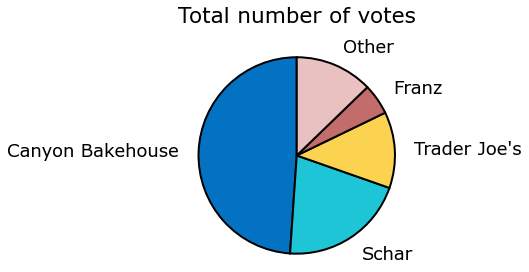

In [6]:
def add_chart_title(column): 
    if column == 'sum':
        return plt.title('Total number of votes', pad=25)
    elif column == 'count':
        return plt.title('Total number of comments', pad=25)

def bin_long_tail(df, count_threshold, column): 
    df_ = df.copy()
    above_threshold = df_[df_['count'] >= count_threshold]
    below_threshold = df_[df_['count'] < count_threshold]
    binned = pd.concat([
            above_threshold[['Brand', column]],
            pd.DataFrame(
                [['Other', int(below_threshold[column].sum())]],
                columns=['Brand', column]
                )
        ])
    return binned

def create_pie_chart(df, count_threshold = 3, column='sum'):
    votes_binned = bin_long_tail(df, count_threshold, column)
    n = len(votes_binned)

    fig, ax = plt.subplots()
    ax.pie(
        votes_binned[column], 
        labels=votes_binned['Brand'], 
        colors=DEFAULT_COLORS[0:n], 
        startangle=90,
        labeldistance=1.2,
        pctdistance=0.7,
        wedgeprops = {"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True}
        )
    ax.axis('equal')  
    add_chart_title(column)
        
    plt.show()

create_pie_chart(votes)

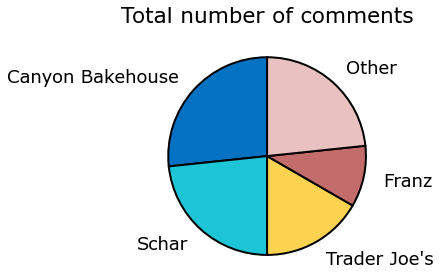

In [7]:
create_pie_chart(votes, column='count')

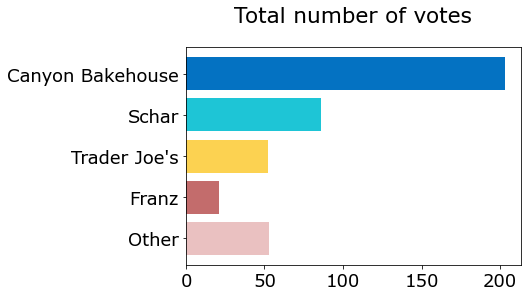

In [8]:
def create_bar_chart(df, count_threshold = 3, column='sum'):
    votes_binned = bin_long_tail(df, count_threshold, column)
    n = len(votes_binned)

    fig, ax = plt.subplots()
    ax.barh(
        votes_binned['Brand'],
        votes_binned[column],  
        color=DEFAULT_COLORS[0:n], 
        )
    ax.invert_yaxis()
    add_chart_title(column)

        
    plt.show()

create_bar_chart(votes)